torch.Size([100, 1, 28, 28]) torch.Size([100])


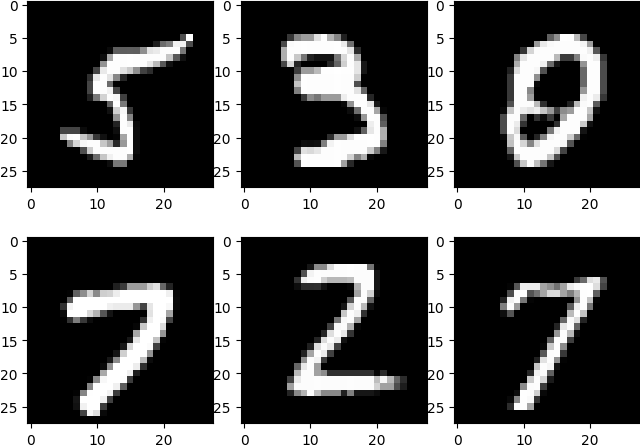

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import os
os.chdir('C:/Users/Errorwaf/Nutstore/1/我的坚果云/Obsidian/Knowledge Vault/Knowledge Vault/LLMStudy/PyTorch/实践案例')

# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyper parameters
input_size = 28*28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate =0.01

# load MNIST
train_set = torchvision.datasets.MNIST(root='./_asset/data', train = True, transform = transforms.ToTensor(), download = True)
test_set = torchvision.datasets.MNIST(root='./_asset/data', train = False, transform = transforms.ToTensor(), download = True)

train_loader = torch.utils.data.DataLoader(dataset = train_set, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_set, batch_size = batch_size, shuffle = False)
examples = iter(train_loader)
samples, labels =next(examples)
print(samples.shape, labels.shape)

for i in range(6):
	plt.subplot(2,3,i+1)
	plt.imshow(samples[i][0], cmap = 'gray')
plt.show()

In [1]:
# 前馈网络
class NeuralNet(nn.Module):
	def __init__(self, input_size, hidden_size, num_classes):
		super(NeuralNet, self).__init__()
		self.l1 = nn.Linear(input_size, hidden_size)
		self.relu = nn.ReLU()
		self.l2 = nn.Linear(hidden_size, num_classes)
		
	def forward(self,x):
		out = self.l1(x)
		out = self.relu(out)
		out = self.l2(out)
		return out
	
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# 损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [1]:
# 训练
n_total_step = len(train_loader)
for epoch in range(num_epochs):
	for i, (images,labels) in enumerate(train_loader):
		# reshape image 100 1 28 28-> 100 784
		images = images.reshape(-1, 28*28).to(device)
		labels = labels.to(device)
		
		# forward
		output = model(images)
		loss = criterion(output, labels)
		
		#backward
		optimizer.zero_grad()
		loss.backward()
		optimizer.step()
		
		# process print
		if (i+1)%100==0:
			print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_step}, loss {loss.item()}')

epoch 1/2, step 100/600, loss 0.18407849967479706
epoch 1/2, step 200/600, loss 0.123194120824337
epoch 1/2, step 300/600, loss 0.16510234773159027
epoch 1/2, step 400/600, loss 0.07005561888217926
epoch 1/2, step 500/600, loss 0.3028913736343384
epoch 1/2, step 600/600, loss 0.2276332527399063
epoch 2/2, step 100/600, loss 0.06881418824195862
epoch 2/2, step 200/600, loss 0.11804468184709549
epoch 2/2, step 300/600, loss 0.03365340828895569
epoch 2/2, step 400/600, loss 0.10729634016752243
epoch 2/2, step 500/600, loss 0.08906970173120499
epoch 2/2, step 600/600, loss 0.035642359405756


In [1]:
# 测试
with torch.no_grad():
	n_correct = 0
	n_samples = 0
	for images,labels in test_loader:
		images = images.reshape(-1, 28*28).to(device)
		labels = labels.to(device)
		output = model(images)
		
		#value, index = torch.max()
		_, predictions = torch.max(output,1)
		n_samples += labels.shape[0]
		n_correct += (predictions == labels).sum().item()
	acc = 100*n_correct/n_samples
	print(f'accuracy = {acc}')

accuracy = 96.59
